<div style="text-align: center; font-family: 'Times New Roman', Times, serif; font-size: 21pt; margin-bottom: 0.3em;"><b> Computational Task 1: Root-Finding</div>
<div style="text-align: center; font-family: 'Times New Roman', Times, serif; font-size: 12.5pt;">Kyle Aaron Coloma</div>
<div style="text-align: center; font-family: 'Times New Roman', Times, serif; font-size: 12.5pt;">Jason Harvey Lorenzo</div>


##
<div style="text-align: left; font-family: 'Times New Roman', Times, serif; font-size: 21pt">
<b> 
Introduction
</b>
</div>

This paper seeks to explore four root-finding techniques, namely fixed-point, bisection, Newton-Raphson, and secant methods. It will investigate practical implementations of each algorithm within the Julia programming language. These implementations will be complemented by illustrative examples aimed at enhancing comprehension of the reader. To further aid in comprehension, a table of x, f(x), and error values will be displayed to show how the approximations evolve for every iteration.

Moreover, this paper will incorporate a visual dimension, integrating graphical plots and visualizations. These graphical representations will serve to shed light on the iterative process of the various methods, effectively showcasing the trajectory towards, or away from, a solution or root. These visualizations are created using Julia’s Plots package.

In its final part, this paper will dive into a comparative analysis of the methods/techniques. In essence, the relative performance of each method will be tested against the others. To support our findings, information from other case studies will  be considered.


---

##
<div style="text-align: left; font-family: 'Times New Roman', Times, serif; font-size: 21pt">
<b> 
0. Error Analysis
</b>
</div>

### 0.1 True Error
Numerical errors in calculations can be divided into two types: truncation errors, which occur when we use approximations instead of exact mathematical procedures, and round-off errors, which happen when we represent precise values with limited-precision numbers. These errors can be described as the difference between the actual value and the approximation. The true error ($E_{t}$) is calculated by:

<center>

$E_{t} = true\: value - approximation$

</center>

This error value doesn't consider the significance of the values being assessed. To address this issue, we can standardize the error in relation to the actual value. This results in the true fractional relative error, which is the true error divided by the actual value. This can be expressed as a percentage by multiplying it by 100, resulting in the true percent relative error:

<center>

$\epsilon_t=|\frac{true\: error}{true\: value}|100\%$  

</center>

### 0.2 Approximate Error

True error requires that a true value (which in the context of our activity means a true root) is available, mostly when the functions can be solved analytically. This, however, is rarely the case for real-world applications. In such cases, another option is to standardize the error by comparing it to the most accurate estimate of the true value, which is the approximation itself, giving the approximation error as follows:

<center>

$\epsilon_a=|\frac{approximate\: error}{approximation}|100\%$  

</center>

Numerical techniques like iterative approaches in this computational task is presented with the challenge of assessing errors with unknown true value. In such situations, the error is typically estimated by measuring the disparity between the previous and current approximations. This leads to the calculation of the percent relative error, expressed as:

<center>

$\epsilon_a=|\frac{{current\: approximation} - {previous\: approximation}}{current\: approximation}|100\%$  

</center>

or for our iterative methods:

<center>

$\epsilon_a=|\frac{x_{n+1}-x_n}{x_n+1}|100\%$  

</center>

Evidently, for the purposes of this computational task, we'll be primarily using percent relative error, and only providing true error when there's an available true root.

### 0.3 The Tabulize Function

In order for us to better see the methods in action, we created the tabulize function that can be used for any of the methods in this ipynb. This function creates a table containing the x values, corresponding f(x) values, percent relative error, and true error if it is inputted (meaning available in the first place) per iteration of their algorithms. Decreasing error likely indicates convergence, and non-convergence otherwise. The function is shown in the next cell and will be used for the next parts:

In [42]:
using DataFrames

function tabulize(x_values,y_values,trueroot=nothing)
    iterations = length(x_values)
    approx_errors = Float64[NaN]
    true_errors=Float64[]
    ea=0.
    i=2

    while i<iterations+1
        ea = abs((x_values[i]-x_values[i-1])/x_values[i])*100
        push!(approx_errors, ea)
        i+=1
    end

    if trueroot==nothing
        df = DataFrame(x=x_values, f_x=y_values, Percent_relative_error = approx_errors)
    else
        et=0.
        i=1
        while i<iterations
            et = abs((trueroot - x_values[i])/trueroot)*100
            push!(true_errors, ea)
            i+=1
        end
        df = DataFrame(x=x_values, f_x=y_values, Percent_relative_error = approx_errors, True_error = true_errors)
    end
    return df
end

tabulize (generic function with 2 methods)

---
## 
<div style="text-align: left; font-family: 'Times New Roman', Times, serif; font-size: 21pt">
<b> 
1. Fixed Point Iteration 
</b>
</div>

The fixed-point iteration method (also known as one-point iteration or successive substitution) is a root finding technique used to find the fixed points (also known as roots or solutions) of a given function. The general iterative formula for the fixed-point method is: 

<center>

$x_{n+1} = g(x_n)$

</center>

where $x_n$ is the current or initial guess and $x_{+1}$ is the next approximation, and $g(x)$ is the function transformed from $f(x)=0$. The iterative formula is used until the difference between the consecutive values of $x$ is less than the tolerance value, indicating sufficiency for convergence.

---
<b> Algorithm for Fixed Point Iteration </b>

1. Make an initial guess.

2. Compute for $x_{n+1}=g(x_n)$

3. Make the following evaluation:

    (a) If the absolute difference between $x_{n+1}$ and $x_n$ is less than the tolerance value, stop and the final value of $x$ is the approximate root of equation $f(x)=0$.

    (b) If the absolute difference between $x_{n+1}$ and $x_n$ is greater than or equal to the tolerance value, set $x_n=x_{n+1}$ return to step 2.
---

<b> Julia Code for Fixed-Point Method </b>

The function code implements the algorithm for Fixed-Point Method, with an additional input of the maximum number of iterations. The maximum number of iterations is crucial to limit the number of iterations and prevent the code from running indefinitely when the function fails to converge. The tolerance denotes how close the compared values are from one another, and is the basis for convergence. The final value of $x$ is the approximate value of the root for the equation.


In [123]:
## Fixed-Point Iteration Function

function fixedpt(g::Function,pzero,eps,N)
    n=1
    x=0.
    x_values = Float64[pzero]
    while n<N
        pone=g(pzero)
        if abs(pone-pzero)<eps
            println("The final value of x is $pone and the iteration number is $n")
            return x_values
        end
        push!(x_values, pone)
        pzero=pone
        n=n+1
    end
    println("Did not converge. The last estimate is p=$pzero.")
    return x_values
end

fixedpt (generic function with 1 method)

---
<b>1.1. SAMPLE PROBLEM ONE: </b> FIXED-POINT METHOD

Using fixed-point iteration to locate the root of:
<center>

$f(x) = ℯ^{-x}-x.$

</center>
<b> SOLUTION FOR SAMPLE PROBLEM ONE </b>

By fixed-point iteration, we set $f(x) = 0$.

So, $ℯ^{-x}-x = 0$.

Then reaaranging the formula to yield $x=g(x)$.

By transposing x to the other side, $x = ℯ^{-x}-x$ where $g(x) = ℯ^{-x}-x$.

Expressed in iterative formula, where $x_{n+1} = g(x_n)$:

<center>

$x_{n+1} = ℯ^{-x_n}$

</center>
This equation wil be used to find the approximate root.


---

<b>1.2. FIXED-POINT METHOD IMPLEMENTATION FOR SAMPLE PROBLEM ONE</b>

This code computes for the approximate iteration using Fixed-Point Method. It also contains the input parameters such as the $g(x)$, the initial guess $x_0$, the tolerance value, and the maximum number of iterations. In addition, it also contains the parameters for the graphical plots and visualization of a series of single iterations - showing the convergence (or divergence).

In [124]:
#Input parameters and calling Fixed-Point iteration function

#Function-related
orig_f(x) = ℯ^(-x) - x
g(x)= ℯ^(-x)
pzero = 0
tol3 = 10^(-4.)
N3 = 30

#Plotting-related
f3(x) = x
max_x3 = 1.2
min_x3 = -0.2
length_x3 = 1000
max_y3 = 1.5
min_y3 = -0.5

#inputting the parameters and calling the function
x_values3=Float64[]
x_values3=fixedpt(g,pzero,tol3,N3);

The final value of x is 0.5671190400572149 and the iteration number is 18


<b>1.3. TABULIZING SAMPLE PROBLEM ONE </b>

The tabulize function was used for SAMPLE PROBLEM ONE showing the data below. Notice the decreasing error for succeeding iterations. If we continue this algorithm indefinitely, we'll get closer and closer to the root.

In [125]:
#Table of x, f(x), approximate error, and true error (if true root is available) for every iteration
y_values3=Float64[]

for x in x_values3
    push!(y_values3, g(x))
end

tabulize(x_values3, y_values3)

Row,x,f_x,Percent_relative_error
,Float64,Float64,Float64
1,0.0,1.0,NaN
2,1.0,0.367879,100.0
3,0.367879,0.692201,171.828
4,0.692201,0.500474,46.8536
5,0.500474,0.606244,38.3091
6,0.606244,0.545396,17.4468
7,0.545396,0.579612,11.1566
8,0.579612,0.560115,5.90335
9,0.560115,0.571143,3.48087


---

<b> 1.4. VISUALIZING SAMPLE PROBLEM ONE </b>

Using the Plots pkg in Julia, the function fixedptPlot was created to visualize f(x) approximated using the previous fixed-point iteration method as shown in the next cell. This allows for reusability later on.

In [126]:
#plotting the given f(x) and visualization of root-finding

using Plots

function fixedptPlot(x_values3, f3::Function, g::Function, orig_f::Function)
    array_size3=length(x_values3)
    y_zeros3 = zeros(array_size3)
    y_values3=Float64[]

    for x in x_values3
        push!(y_values3, g(x))
    end

    x = range(min_x3, max_x3, length=length_x3)
    y = f3.(x)
    y1= g.(x)
    y2= orig_f.(x)

    Plots.plot(x, y, ylims=(min_y3, max_y3), legend=true, grid=true, xlabel="x", ylabel="y", color=:black, label="y=x") #Plots y=x line
    plot!(x, y1, ylims=(min_y3, max_y3), legend=true, grid=true, xlabel="x", ylabel="y", label="g(x)") #Plots g(x)
    plot!(x, y2, ylims=(min_y3, max_y3), legend=true, grid=true, xlabel="x", ylabel="y", label="f(x)", linewidth = 2,color=:blue) #Plots original f(x)
    hline!([0], color=:black, linestyle=:dash, label=false) #Draws horizontal line at y=0 (x-axis)

    plot!([x_values3[array_size3],x_values3[array_size3]], [y_values3[array_size3],0], label=false, linestyle=:dash, linewidth=1,color=:black)

    scatter!(x_values3, y_values3, label=false, markersize=3, markercolor=:red)
    scatter!([x_values3[array_size3]], [0], color=:black, markersize=4,label=false)

    i=1
    while i<array_size3
        plot!([x_values3[i],x_values3[i]], [y_values3[i],g(x_values3[i])], linestyle=:solid, linewidth=0.4,color=:gray, label=false)
        quiver!([x_values3[i]], [g(x_values3[i])], quiver=([(x_values3[i+1] - x_values3[i])], [y_values3[i+1]-g(x_values3[i])]), label=false,linewidth=0.7, arrow=true, linestyle=:dash)
        i+=1
    end

    current()
end

fixedptPlot (generic function with 1 method)

Using the fixedptPlot() function, SAMPLE PROBLEM ONE can be visualized as follows:

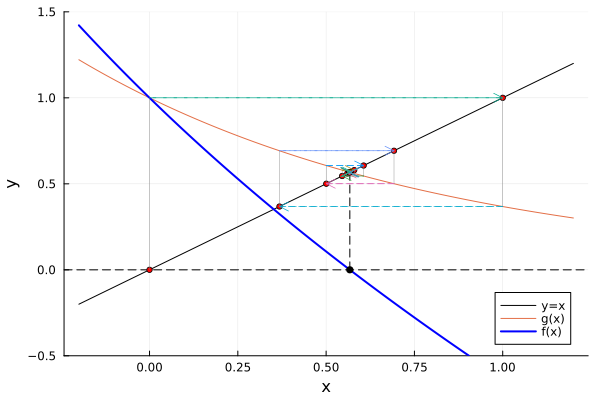

In [80]:
fixedptPlot(x_values3, f3, g, orig_f)

The plot shows the line y=x, g(x), and  f(x), whose root has to be solved, in black, red, and blue, respectively. The plot shows the movement of the approximations for each iteration as  g(x) is corrected by x and vice versa. This function in particular results in a spiral or cobweb looking visualization as the approximations converge to the root. We can see from the black dot and dashed line that the approximated root is very close to f(x)=0.

---
## 
<div style="text-align: left; font-family: 'Times New Roman', Times, serif; font-size: 21pt">
<b> 
2. Bisection Method
</b>
</div>

The Bisection method (also known as binary chopping, interval halving, or Bolzao's method) is an incremental search technique that repeatedly divides an interval in half. It checks whether the function changes sign over the interval and evaluates the function at the midpoint. If the product of the function values at the interval endpoints is negative (one positive and one negative value), it indicates the presence of a root within the interval, and the root's location is estimated as the midpoint of that subinterval where the sign change occurred. This method is effective for finding roots of continuous functions where the initial interval brackets the root, and it iteratively refines the estimate until convergence to the root is achieved.


---

<b> Algorithm fo Bisection Method </b>

1. Select a lower and upper guesses for the root such that the function changes sign over the interval. This cna be checked by ensuring that $f(x_l)f(x_u)<0$.

2. An estimate of the root $x_r$ is determined by $x_r=\frac{(x_l+x_u)}{2}$

3. Make the folllowing evaluation:

    (a) If $f(x_l)f(x_u) < 0$, the root lies in the lower subinterval. Therefore, set $x_u = x_r$, and return to step 2. 

    (b) If $f(x_l)f(x_u) > 0$, the root lies in the lower subinterval. Therefore, set $x_l = x_r$, and return to step 2. 
    
    (c) If $f(x_r) = 0$ or If the absolute difference between $x_l-x_u$ is less than the tolerance value, the root equals $x$; stop.

---

<b> Julia Code for Bisection Method </b>

The function code implements the algorithm for Fixed-Point Method, with an additional input of the maximum number of iterations. The maximum number of iterations is crucial to limit the number of iterations and prevent the code from running indefinitely when the function fails to converge. The tolerance denotes how close the compared values are from one another, and is the basis for convergence. The final value of $x$ is the approximate value of the root for the equation.

In [34]:
## Bisection Method Function

function bisection(f::Function, a, b, eps, N)
    n = 1
    p = 0.0 

    p_values = Float64[]

    while n <= N
        p = a + (b - a) / 2
        push!(p_values, p)

        if f(p) == 0 || abs(a - b) < eps
            println("x is $p and the iteration number is $n")
            return p_values
        end

        if f(a) * f(p) < 0
            b = p
        else
            a = p
        end
        n += 1
    end

    y = f(p)
    println("Method did not converge. The last iteration gives $p with function value $y")
    return p_values
end

bisection (generic function with 1 method)

---

<b>2.1 SAMPLE PROBLEM TWO. </b> BISECTION METHOD

Find the root of the function below using the bisection method: 
<center>

$f(x) = x^3+4x^2-10$

</center>

<b> SOLUTION FOR SAMPLE PROBLEM TWO </b> 

The Bisection method is simple and straightforward root finding technique that does require to derive any function. The Bisection method only requires two inital guessses/intervals.

In this problem, the two initial guesses or intervals are one (1) and two (2).

---

<b>2.2. BISECTION METHOD IMPLEMENTATION FOR SAMPLE PROBLEM TWO</b>

This code computes for the approximate iteration using Bisection Method. It also contains the input parameters such as the $f(x)$, the two initial guess $x_0$, the tolerance value, and the maximum number of iterations. In addition, it also contains the parameters for the graphical plots and visualization of a series of single iterations - showing the convergence (or divergence).

In [90]:
#Input parameters and calling Fixed-Point iteration function

#Function-related
f4(x) = x^3+4x^2-10
a = 1
b = 2
tol4 = 10^(-4.)
N4 = 20

#Plotting-related
max_x4 = 1.5
min_x4 = 1.2
length_x4 = 1000
max_y4 = 2.5
min_y4 = -2.5

#inputting the parameters and calling the function
x_values4=Float64[]
x_values4=bisection(f4,a,b,tol3,N4);

x is 1.365203857421875 and the iteration number is 15


<b>2.3. TABULIZING SAMPLE PROBLEM TWO </b>

The tabulize function was used for SAMPLE PROBLEM TWO showing the data below. Again, the decreasing error indicates a converging behavior to the root.

In [91]:
#Table of x, f(x), approximate error, and true error (if true root is available) for every iteration
y_values4=Float64[]

for x in x_values4
    push!(y_values4, f4(x))
end

tabulize(x_values4, y_values4)

Row,x,f_x,Percent_relative_error
,Float64,Float64,Float64
1,1.5,2.375,NaN
2,1.25,-1.79688,20.0
3,1.375,0.162109,9.09091
4,1.3125,-0.848389,4.7619
5,1.34375,-0.350983,2.32558
6,1.35938,-0.0964088,1.14943
7,1.36719,0.0323558,0.571429
8,1.36328,-0.03215,0.286533
9,1.36523,7.20248e-5,0.143062


---

<b> 2.4. VISUALIZING SAMPLE PROBLEM TWO </b>

Like before, a bisectionPlot() function was created to visualize approximating roots of functions iteratively with bisection method.

In [180]:
using Plots

function bisectionPlot(x_values4, f4::Function)
    array_size4=length(x_values4)
    y_zeros4 = zeros(array_size4)
    y_values4=Float64[]

    for x in x_values4
        push!(y_values4, f4(x))
    end

    x = range(min_x4, max_x4, length=length_x4)
    y = f4.(x)

    Plots.plot(x, y, ylims=(min_y4, max_y4), color=:blue, legend=false, grid=true, xlabel="x", ylabel="f(x)") #Plots f(x)
    hline!([0], color=:black, linestyle=:dash, label="y=0") #Draws horizontal line at y=0 (x-axis)

    scatter!(x_values4, y_values4, label="Iteration Points", markersize=5, markercolor=:red)
    scatter!([x_values4[1],x_values4[2]], [y_values4[1],y_values4[2]], label=false, color=:green, markersize=4) #Marks initial guesses x0,x1 as green

    i=3
    while i<array_size4
        quiver!([x_values4[i-2]], [y_values4[i-2]], quiver=([(x_values4[i] - x_values4[i-2])], [0]),label=false, color=:black, linewidth=0.7, legend=false, arrow=true, linestyle=:dash)
        quiver!([x_values4[i-1]], [y_values4[i-1]], quiver=([(x_values4[i] - x_values4[i-1])], [0]),label=false, color=:black, linewidth=0.7, legend=false, arrow=true, linestyle=:dash)
        plot!([x_values4[i],x_values4[i]], [y_values4[i-2],y_values4[i-1]], label=false, linestyle=:solid, linewidth=1)
        i+=2
    end

    current()

end

bisectionPlot (generic function with 1 method)

Using the bisectionPlot() function, SAMPLE PROBLEM TWO can be visualized as follows:

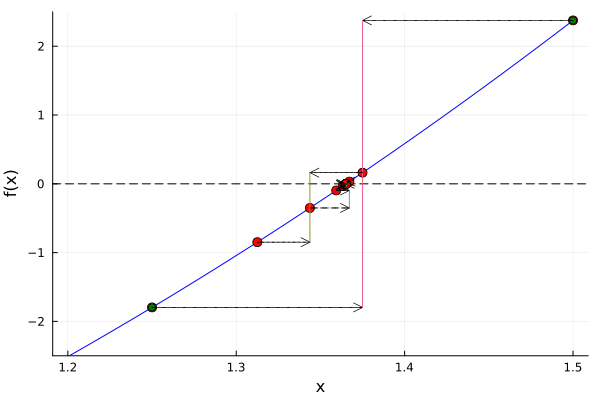

In [179]:
bisectionPlot(x_values4, f4)

The plot shows the development of the approximations as the algorithm iterates. The green dots represent the starting a and b values and the arrows display their midpoint. The midpoint is automatically set as a next bracketing point. Depending on where the product f(a)f(b) is negative, a or b is assigned as the other bracketing point as explained in the algorithm.

---
## 
<div style="text-align: left; font-family: 'Times New Roman', Times, serif; font-size: 21pt">
<b> 
3. Newton-Raphson Method
</b>
</div>

Newton-Raphson's Method, is another iteration method for solving $f(x)=0$, where $f$ is assumed to have a continous derivative $f'$. The method is commonly used because of its simplicity and great speed. The underlying idea is that we approximate the graph of $f$ by suitable tangents. Using an approximate value of $x_0$ obtained from the graph $f$, we let $x_1$ be the point of intersection of the x-axis and thangent to the curve of $f$ at $x_0$.



---

<b> Algorithm for Newton-Raphson Method </b>

1. Calculate the derivative $f'(x)$.

2. Make an initial guess.

3. Compute for: 
<center>

$x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}$

</center>

4. Make the following evaluation

    (a) If $f(x) = 0$ or If the absolute difference between $x_{n+1}$ and $x_n$ is less than the tolerance value, stop and the final value of $x$ is the approximate root.

    (b) Otherwise, set $x_n = x_{n+1}$ return to step 3.
    
---

<b> Julia Code for Newton-Raphson Method </b>

The function code implements the algorithm for Fixed-Point Method, with an additional input of the maximum number of iterations. The maximum number of iterations is crucial to limit the number of iterations and prevent the code from running indefinitely when the function fails to converge. The tolerance denotes how close the compared values are from one another, and is the basis for convergence. The final value of $x$ is the approximate value of the root for the equation.

In [38]:
#Newton-Raphson method function
function newtonRaphson(f::Function,fprime::Function,xin,tol,N)
    n=1
    x=0.
    x_values = Float64[xin]
    while n<=N
        x=xin-f(xin)/fprime(xin)
        if f(x)==0 || abs(x-xin)<tol
            println("x is $x and the iteration number is $n")
            return x_values
        end
        push!(x_values,x)
        xin=x
        n=n+1
    end
    y=f(x)
    println("Method did not converge. The last iteration gives $x with
        function value $y")
    return x_values
end

newtonRaphson (generic function with 1 method)

---
<b> 3.1 SAMPLE PROBLEM THREE. </b> NEWTON-RAPHSON METHOD

Solve $x^3 = 5x+6$ by Newton-Raphson's method


<b>3.2. NEWTON-RAPHSON METHOD IMPLEMENTATION FOR SAMPLE PROBLEM THREE</b>

This code computes for the approximate iteration using Newton-Raphson Method. It also contains the input parameters such as $f(x)$ and $f'(x)$, the initial guess $x_0$, the tolerance value, and the maximum number of iterations. In addition, it also contains the parameters for the graphical plots and visualization of a series of single iterations - showing the convergence (or divergence).

In [39]:
#Input parameters and calling Newton-Raphson method function

#Function-related
f(x) = x^3-5x-6
fprime(x) = 3x^2-5
xin = 2
tol = 10^(-4.)
N = 30

#Plotting-related
max_x = 3.25
min_x = 1.75
length_x = 1000
max_y = 10
min_y = -10

#inputting the parameters and calling the function
x_values=Float64[]
x_values=newtonRaphson(f,fprime,xin,tol,N);

x is 2.6890953236426456 and the iteration number is 5


<b>3.3. TABULIZING SAMPLE PROBLEM THREE </b>

The tabulize function was used for SAMPLE PROBLEM THREE showing the data below. Again, the decreasing error indicates a converging behavior to the root. Notice the small amount of iterations required for us to converge (with respect to tolerance).

In [40]:
#Table of x, f(x), approximate error, and true error (if true root is available) for every iteration
y_values=Float64[]

for x in x_values
    push!(y_values, f(x))
end

tabulize(x_values, y_values)

Row,x,f_x,Percent_relative_error
,Float64,Float64,Float64
1,2.0,-8.0,NaN
2,3.14286,9.32945,36.3636
3,2.76411,1.29816,13.7021
4,2.69168,0.0431323,2.69119
5,2.6891,5.36217e-5,0.0958431


---

<b> 3.4. VISUALIZING SAMPLE PROBLEM THREE </b>

A newtonRaphsonPlot() function was created to visualize approximating roots with the method iteratively.

In [109]:
#plotting the given f(x) and visualization of root-finding

using Plots

function newtonRaphsonPlot(x_values,f::Function, fprime::Function)
    array_size2=length(x_values)
    y_zeros = zeros(array_size)

    x = range(min_x, max_x, length=length_x)
    y = f.(x)

    Plots.plot(x, y, ylims=(min_y, max_y), legend=false, grid=false, xlabel="x", ylabel="f", color=:black) #Plots f(x)
    hline!([0], color=:black, linestyle=:dash, label="y=0") #Draws horizontal line at y=0 (x-axis)

    scatter!(x_values, y_zeros, label=false, color=:black, markersize=3) #Draws points of intersection of tangent lines and x-axis
    scatter!(x_values, y_values, label=false, color=:red, markersize=4) #Draws all (x, f(x)) algorithm passes by
    scatter!([x_values[1],x_values[1]], [y_values[1],0], label=false, color=:green, markersize=4) #Marks initial guess x0 as green

    # for x_point in x_values #Iterates to draw each tangent line for every x passed by
    #     alpha = opacity_control/array_size
    #     tangent_line(x) = fprime(x_point) * (x - x_point) + f(x_point)
    #     plot!(x, tangent_line, label=false, linestyle=:solid, color=:red, alpha=alpha)
    # end

    i=2
    while i<array_size2
        quiver!([x_values[i-1]], [y_values[i-1]], quiver=([(x_values[i] - x_values[i-1])], [-y_values[i-1]]),label=false, linewidth=2, legend=false, arrow=true, linestyle=:solid)
        i+=1
    end

    for x_point in x_values #Iterates to draw each line from (x,f(x)) to (x,0)
        plot!([x_point, x_point], [f(x_point), 0], label=nothing, linestyle=:dash, color=:black,alpha=0.6)
    end

    current()
end


newtonRaphsonPlot (generic function with 1 method)

Using the newtonRaphsonPlot() function, SAMPLE PROBLEM THREE can be visualized as follows:

In [1]:
newtonRaphsonPlot(x_values,f, fprime)

UndefVarError: UndefVarError: `newtonRaphsonPlot` not defined

The plot shows the function whose roots are being approximated. The green dot represents the initial x-value. The next x-value is identified as the intersection of the line tangent to current x (colored solid lines) and the x-axis (dashed black line). That is then fed back to the function (gray dashed line) and the cycle continues as the approximation converges to the root.

---
##
<div style="text-align: left; font-family: 'Times New Roman', Times, serif; font-size: 21pt">
<b> 
4. Secant Method
</b>
</div>

The Secant Method is an iterative numerical algoritthm used for approximating the roots of a given nonlinear equation $f(x)=0$. Unlike the Newton-Raphson method, which requires knowledge of the derivative $f(x)$, the Secant Method does not rely on derivative inofrmation. Instead, it approximates the derivative using finite differences between function values at two successive points.

---
<b> Algorithm for Secant Method </b>

1. Make two guesses.

2. Compute for:

<center>

$x_{n+1}=x_n-\frac{f(x_n)(x_{n-1}-x_n)}{f(x_{n-1})-f(x_n)}$

</center>

3. Make the following evaluation

    (a) If $f(x) = 0$ or If the absolute difference between $x_{n+1}$ and $x_n$ is less than the tolerance value, stop and the final value of $x$ is the approximate root.

    (b) Otherwise, set $x_n = x_{n+1}$ return to step 2.


---

<b> Julia Code for Secant Method </b>

The function code implements the algorithm for Fixed-Point Method, with an additional input of the maximum number of iterations. The maximum number of iterations is crucial to limit the number of iterations and prevent the code from running indefinitely when the function fails to converge. The tolerance denotes how close the compared values are from one another, and is the basis for convergence. The final value of $x$ is the approximate value of the root for the equation.

In [130]:
#Secant method function

function secant(f::Function,xzero,xone,tol,N)
    n=1
    x=0.
    x_values = Float64[xzero,xone]
    while n<=N
        x=xone-f(xone)*(xone-xzero)/(f(xone)-f(xzero))
        if f(x)==0 || abs(x-xone)<tol
            println("x is $x and the iteration number is $n")
            return x_values
        end
        push!(x_values,x)
        xzero=xone
        xone=x
        n=n+1
    end
    y=f(x)
    println("Method did not converge. The last iteration gives xone with
        function value $y")
    return x_values
end


secant (generic function with 1 method)

---
<b>4.1. SAMPLE PROBLEM FOUR: </b> SECANT METHOD

Find the roots of the function below using secant method:

<center>

$f(x) = cos(x)-x$

</center>


<b>4.2. SECANT METHOD IMPLEMENTATION FOR SAMPLE PROBLEM FOUR</b>


This code computes for the approximate iteration using the Secant Method. It also contains the input parameters such as the given $f(x)$, the two initial guess $x_0$, the tolerance value, and the maximum number of iterations. In addition, it also contains the parameters for the graphical plots and visualization of a series of single iterations - showing the convergence (or divergence).

In [173]:
#Input parameters and calling Newton-Raphson method function

#Function-related
f2(x) = cos(x)-x
xzero = 0
xone = 0.1
tol2 = 10^(-4.)
N2 = 20

#Plotting-related
max_x2 = 1.1
min_x2 = -0.1
length_x2 = 1000
max_y2 = 1.1
min_y2 = -0.5

#inputting the parameters and calling the function
x_values2=Float64[]
x_values2=secant(f2,xzero,xone,tol2,N2);

x is 0.7390851284702705 and the iteration number is 5


<b>4.3. TABULIZING SAMPLE PROBLEM FOUR </b>

The tabulize function was used for SAMPLE PROBLEM FOUR showing the data below. Again, the decreasing error indicates a converging behavior to the root. Note that rows 1 and 2 are the inputs, increasing the length of the list by 1.

In [174]:
#Table of x, f(x), approximate error, and true error (if true root is available) for every iteration
y_values2=Float64[]

for x in x_values2
    push!(y_values2, f2(x))
end

tabulize(x_values2, y_values2)

Row,x,f_x,Percent_relative_error
,Float64,Float64,Float64
1,0.0,1.0,NaN
2,0.1,0.895004,100.0
3,0.952419,-0.372705,89.5004
4,0.701809,0.061867,35.7092
5,0.737486,0.0026748,4.83773
6,0.739099,-2.24762e-5,0.218132


---

<b> 4.4. VISUALIZING SAMPLE PROBLEM FOUR </b>

A secantPlot() function was created to visualize approximating roots with the method iteratively.

In [175]:
#plotting the given f(x) and visualization of root-finding

using Plots

function secantPlot(x_values2, f2::Function)
    array_size2=length(x_values2)
    y_zeros2 = zeros(array_size2)
    y_values2=Float64[]

    for x in x_values2
        push!(y_values2, f2(x))
    end

    x2 = range(min_x2, max_x2, length=length_x2)
    y2 = f2.(x2)


    Plots.plot(x2, y2, ylims=(min_y2, max_y2), legend=false, grid=false, xlabel="x", ylabel="f", color=:black) #Plots f(x)
    hline!([0], color=:black, linestyle=:dash, label="y=0") #Draws horizontal line at y=0 (x-axis)

    scatter!(x_values2, y_zeros2, label=false, color=:black, markersize=3) #Draws points of intersection of tangent lines and x-axis
    scatter!(x_values2, y_values2, label=false, color=:red, markersize=4) #Draws all (x, f(x)) algorithm passes by
    scatter!([x_values2[1],x_values2[2]], [y_values2[1],y_values2[2]], label=false, color=:green, markersize=4) #Marks initial guesses x0,x1 as green

    i=2
    while i<array_size2
        secant_line(x) = ((f2(x_values2[i])-f2(x_values2[i-1]))/(x_values2[i]-x_values2[i-1])) * (x - x_values2[i-1]) + f2(x_values2[i-1])
        plot!(x2, secant_line, label=false, linestyle=:solid)
        i+=1
    end

    for x_point in x_values2 #Iterates to draw each line from (x,f(x)) to (x,0)
        quiver!([x_point], [0], quiver=([0], [f2(x_point)]),label=false, color=:black, linewidth=1, legend=false, arrow=true, linestyle=:dash)
    end

    current()
end

secantPlot (generic function with 1 method)

Using the secantPlot() function, SAMPLE PROBLEM FOUR can be visualized as follows:

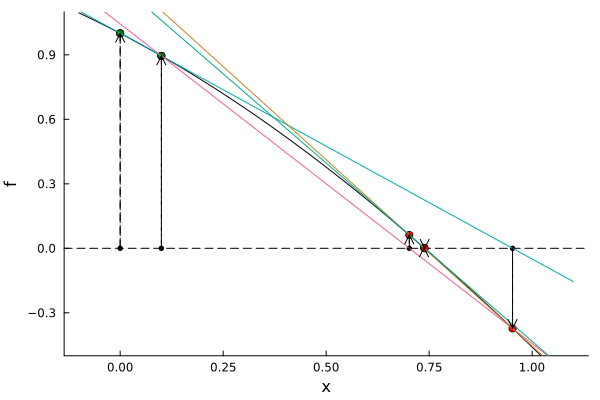

In [176]:
secantPlot(x_values2, f2)

The plot shows the initial points in green. Unlike bisection method, secant method doesn't require bracketing the root. The Secant method constructs a straight line (secant line) connecting these two points, and the x-value at which this secant line intersects the x-axis becomes the next estimate for the root. This process repeats iteratively, extending the secant line with each step and refining the root estimate until convergence

---

##
<div style="text-align: left; font-family: 'Times New Roman', Times, serif; font-size: 21pt">
<b> 
5. Comparison of Root Finding Techniques
</b>
</div>

In this section of the paper, we undertake a comparative analysis of fixed point, bisection, Newton-Raphson, and secant methods for root determination within the domain of non-linear equations. Our investigation leverages the Julia programming language as a robust computational tool.


This paper aims to augment its findings by juxtaposing them against a prior study conducted by Nwry, Kareem, Ibrahim, and Mohammed, titled "Comparison between Bisection, Newton-Raphson, and Secant Method for Determining the Root of Non-Linear Equations Using MATLAB." In their research, the authors exclusively utilized the Bisection, Newton-Raphson, and Secant methods to elucidate the numerical approximation of non-linear equation problems.


By expanding our analysis to encompass the fixed point method and drawing upon MATLAB-based results from the aforementioned research, we strive to provide a comprehensive and insightful evaluation of these root-finding algorithms, thereby contributing to the existing body of knowledge in this domain.


This section of the paper will only discuss the results of the findings, since the algorithm and code that the methods will be using are from what was discussed before.

This section will find the approximate solution to $f(x) = ℯ^x+2^{-x}+2cos(x)-6 = 0$ which is continous within $1 ≤ x ≥ 2$.



<b> I. Result for Fixed Point Method</b>


Since the given equation is an example of a transcendental equation (equations that involve functions that cannot be expressed in terms of finite number of algebraic operaton). We are unable to find the equation for $x$. It is not possible to find a closed-form expression for $x$, therefore, we suggest using the other 3 methods.

<b> II. Result for Bisection Method </b>

In [ ]:
#Input parameters and calling Fixed-Point iteration function

#Function-related
test_f2(x) = ℯ^x+(2.)^(-x)+2cos(x)-6
lower = 1
upper = 2
tolerance2 = 10^(-4.)
max_N2 = 30

#inputting the parameters and calling the function
x_c_val2=Float64[]
x_c_val2=bisection(test_f2,lower,upper,tolerance2,max_N2);

x is 1.829376220703125 and the iteration number is 15


<b> III. Result for Newton-Raphson Method </b>

In [ ]:
#Input parameters and calling Newton-Raphson method function

#Function-related
test_f3(x) = ℯ^x+(2.)^(-x)+2cos(x)-6
test_fprime3(x) = -(2.)^(-x)log(2)+ℯ^(x)-2sin(x)
x_in3 = 1
tolerance3 = 10^(-4.)
max_N3 = 30

#inputting the parameters and calling the function
x_c_val3=Float64[]
x_c_val3=newtonRaphson(test_f3,test_fprime3,x_in3,tolerance3,max_N3);

x is 1.8293811767848775 and the iteration number is 9


<b> IV. Secant Method </b>

In [ ]:
#Input parameters and calling Newton-Raphson method function

#Function-related
test_f3(x) = ℯ^x+(2.)^(-x)+2cos(x)-6
x_c_zero = 1    
x_c_one = 2
tolerance4 = 10^(-4.)
max_N4 = 30

#inputting the parameters and calling the function
x_values4=Float64[]
x_values4=secant(test_f3,x_c_zero,x_c_one,tolerance4,max_N4);

x is 1.8293834739842125 and the iteration number is 5


<b> V. Discussion </b>

Based on the result, the given function or problem was solved by using bisection, Newton-Raphson, and the secant method. However, because the given function was an example of a transcendental equation, it was not possible to use the fixed-point method. This would also suggest the reason why the study conducted by Nwry, Kareem, Ibrahim, and Mohammed did not use the fixed point method. The bisection method made use of 15 iterations, the Newton-Raphson method made use of 9, and the secant method made use of 5 iterations. It is also important to note that in Newton-Raphson's method, it made use of a derive function of $f(x)$, which was less straightforward than the bisection and secant methods.

<b> VI. Conclusion </b>

From the results and discussion, we can conclude that the Secant method is also much more strictly convergent in terms of the number of iterations. Unlike Newton-Raphson, which required the derivation of the function, The bisection method showed a promising result, but when compared to the Newton-Raphson and Secant methods, it lags behind because of the number of iterations required. Also, the function highlighted the limitations and weaknesses of the fixed-point method. Finally, when we compare the results from this test to the study conducted by Nwry, Kareem, Ibrahim, and Mohammed, both have shown favorable results for the Secant Method.

## References

[1] S. C. Chapra and R. P. Canale, **Numerical methods for engineers**. Boston: Mcgraw-Hill, 2006.

[2] Giray Ökten, **First Semester in Numerical Analysis with Julia**, 2019. doi: [10.33009/jul]\(https://doi.org/10.33009/jul).

[3] A. Nwry, H. Kareem, R. Ibrahim, and S. Mohammed, "Comparison Between Bisection, Newton and Secant Methods for determining the root of the Non-Linear equation using MATLAB," **Turkish Journal of Computer and Mathematics Education**, vol. 12, no. 14, 2021, Accessed: Aug. 20, 2023. [Online]. Available: https://turcomat.org/index.php/turkbilmat/article/view/10397.